# Problem Statement - HR Analytics

***Batch-I, Group - I4***

***Group Members-
Manthan Chittora, Anjali Indrala, Snehith Basiraju, Mohammad Khan***

# Task 2.1

In [714]:
import pandas as pd
import numpy
js=pd.read_csv("Employee_joining_status.csv")
hr=pd.read_csv("hr_Hiring_details.csv")
mapping=pd.read_csv("LOB_mapping_P4.csv")
import warnings
warnings.filterwarnings("ignore")

*Performing Outer Join to merge hr and mapping*

In [715]:
final = pd.merge(hr,mapping, on='LOB_id', how='outer')

*Sorting them by Serial Number*

In [716]:
final = final.sort_values(['Sno'])

*Performing Outer Join to merge previous one and Employee joining status*

In [717]:
final_csv=pd.merge(final,js, on='Candidate Ref', how='outer')
del final_csv['Unnamed: 17']

*Finding Null Values*

**Task 2.2 - Missing values identification and treatment**

In [718]:
final_csv.isnull().sum()

Sno                             0
Candidate Ref                   0
DOJ Extended                    0
Duration to accept offer        0
Notice period                   0
Offered band                   13
Pecent hike expected in CTC     0
Percent hike offered in CTC     0
Percent difference CTC          0
Joining Bonus                   0
Candidate relocate actual       0
Gender                          0
Candidate Source                0
Rex in Yrs                      0
Location                        0
Age                            15
LOB_id                          0
LOB                             0
Status                          0
dtype: int64

*As we see there are 13 null values in Offered band and 15 null values in Age column*

In [719]:
m=final_csv['Age'].mean()

*Filling NaN values with Mean in Age*

In [720]:
final_csv['Age']=final_csv['Age'].fillna(m)

*Filling NaN values with Mode in Offered Band*

In [721]:
m1=final_csv['Offered band'].mode()
m1[0]
final_csv['Offered band']=final_csv['Offered band'].fillna(m1[0])

*Dropping any duplicate Entries*

In [722]:
final_csv.drop_duplicates(subset ="Candidate Ref",
                     keep = False, inplace = True)

*After Combining all three csv, we get final_csv*

In [723]:
final_csv

Sno  Candidate Ref DOJ Extended  Duration to accept offer  \
0         1        2110407          Yes                        14   
1         2        2112635           No                        18   
2         3        2112838           No                         3   
3         4        2115021           No                        26   
4         5        2115125          Yes                         1   
...     ...            ...          ...                       ...   
8990  12319        3822427           No                         4   
8991  12327        3828206          Yes                         2   
8992  12331        3834159           No                         0   
8993  12332        3835433           No                         0   
8994  12333        3836076           No                         2   

      Notice period Offered band  Pecent hike expected in CTC  \
0                30           E2                       -20.79   
1                30           E2                        50.00   
2                45           E2                        42.84   
3                30           E2                        42.84   
4               120           E2                        42.59   
...             ...          ...                          ...   
8990              0           E1                       191.67   
8991              0           E1                       150.00   
8992              0           E2                        35.42   
8993             30           E1                        76.92   
8994              0           E1                        45.25   

      Percent hike offered in CTC  Percent difference CTC Joining Bonus  \
0                           13.16                   42.86            No   
1                          320.00                  180.00            No   
2                           42.84                    0.00            No   
3                           42.84                    0.00            No   
4                           42.59                    0.00            No   
...                           ...                     ...           ...   
8990                       191.67                    0.00            No   
8991                       150.00                    0.00            No   
8992                        35.42                    0.00            No   
8993                        53.85                  -13.04            No   
8994                        14.09                  -21.45            No   

     Candidate relocate actual  Gender   Candidate Source  Rex in Yrs  \
0                           No  Female             Agency           7   
1                           No    Male  Employee Referral           8   
2                           No    Male             Agency           4   
3                           No    Male  Employee Referral           4   
4                          Yes    Male  Employee Referral           6   
...                        ...     ...                ...         ...   
8990                        No    Male  Employee Referral           1   
8991                        No  Female             Direct           3   
8992                        No    Male             Direct           5   
8993                        No    Male             Direct           4   
8994                        No  Female  Employee Referral           1   

     Location   Age  LOB_id    LOB  Status  
0       Noida  34.0       1    ERS  Joined  
1     Chennai  34.0       2  INFRA  Joined  
2       Noida  27.0       2  INFRA  Joined  
3       Noida  34.0       2  INFRA  Joined  
4       Noida  34.0       2  INFRA  Joined  
...       ...   ...     ...    ...     ...  
8990  Chennai  34.0       1    ERS  Joined  
8991  Chennai  34.0       4   BFSI  Joined  
8992    Noida  34.0       2  INFRA  Joined  
8993    Noida  34.0       2  INFRA  Joined  
8994  Chennai  34.0       2  INFRA  Joined  

[8995 rows x 19 columns]

*Table of all entries who have joined*

In [724]:
joined=final_csv[(final_csv['Status']=='Joined')]
joined

Sno  Candidate Ref DOJ Extended  Duration to accept offer  \
0         1        2110407          Yes                        14   
1         2        2112635           No                        18   
2         3        2112838           No                         3   
3         4        2115021           No                        26   
4         5        2115125          Yes                         1   
...     ...            ...          ...                       ...   
8990  12319        3822427           No                         4   
8991  12327        3828206          Yes                         2   
8992  12331        3834159           No                         0   
8993  12332        3835433           No                         0   
8994  12333        3836076           No                         2   

      Notice period Offered band  Pecent hike expected in CTC  \
0                30           E2                       -20.79   
1                30           E2                        50.00   
2                45           E2                        42.84   
3                30           E2                        42.84   
4               120           E2                        42.59   
...             ...          ...                          ...   
8990              0           E1                       191.67   
8991              0           E1                       150.00   
8992              0           E2                        35.42   
8993             30           E1                        76.92   
8994              0           E1                        45.25   

      Percent hike offered in CTC  Percent difference CTC Joining Bonus  \
0                           13.16                   42.86            No   
1                          320.00                  180.00            No   
2                           42.84                    0.00            No   
3                           42.84                    0.00            No   
4                           42.59                    0.00            No   
...                           ...                     ...           ...   
8990                       191.67                    0.00            No   
8991                       150.00                    0.00            No   
8992                        35.42                    0.00            No   
8993                        53.85                  -13.04            No   
8994                        14.09                  -21.45            No   

     Candidate relocate actual  Gender   Candidate Source  Rex in Yrs  \
0                           No  Female             Agency           7   
1                           No    Male  Employee Referral           8   
2                           No    Male             Agency           4   
3                           No    Male  Employee Referral           4   
4                          Yes    Male  Employee Referral           6   
...                        ...     ...                ...         ...   
8990                        No    Male  Employee Referral           1   
8991                        No  Female             Direct           3   
8992                        No    Male             Direct           5   
8993                        No    Male             Direct           4   
8994                        No  Female  Employee Referral           1   

     Location   Age  LOB_id    LOB  Status  
0       Noida  34.0       1    ERS  Joined  
1     Chennai  34.0       2  INFRA  Joined  
2       Noida  27.0       2  INFRA  Joined  
3       Noida  34.0       2  INFRA  Joined  
4       Noida  34.0       2  INFRA  Joined  
...       ...   ...     ...    ...     ...  
8990  Chennai  34.0       1    ERS  Joined  
8991  Chennai  34.0       4   BFSI  Joined  
8992    Noida  34.0       2  INFRA  Joined  
8993    Noida  34.0       2  INFRA  Joined  
8994  Chennai  34.0       2  INFRA  Joined  

[7313 rows x 19 columns]

*Table of all entries who have not joined*

In [725]:
notjoined=final_csv[(final_csv['Status']=='Not Joined')]
notjoined

Sno  Candidate Ref DOJ Extended  Duration to accept offer  \
10       13        2151180           No                       120   
12       15        2156236          Yes                        14   
13       16        2158703           No                        44   
14       17        2161257           No                         7   
16       19        2166041          Yes                        98   
...     ...            ...          ...                       ...   
8831  11948        3682060           No                        10   
8877  12038        3700315           No                        15   
8921  12133        3733027           No                         0   
8978  12271        3798484           No                         4   
8989  12309        3822084           No                         0   

      Notice period Offered band  Pecent hike expected in CTC  \
10               30           E2                         5.26   
12               30           E2                        50.00   
13               75           E2                        45.45   
14               30           E3                        53.85   
16               30           E2                        50.00   
...             ...          ...                          ...   
8831             30           E1                        58.73   
8877             30           E1                        33.33   
8921              0           E1                       100.00   
8978              0           E1                        10.00   
8989             30           E1                        50.00   

      Percent hike offered in CTC  Percent difference CTC Joining Bonus  \
10                         -60.53                  -62.50            No   
12                         287.50                  158.33            No   
13                          60.00                   10.00            No   
14                          50.00                   -2.50            No   
16                         165.36                   76.91            No   
...                           ...                     ...           ...   
8831                        42.86                  -10.00            No   
8877                       116.67                   62.50            No   
8921                       140.00                   20.00            No   
8978                        10.00                    0.00            No   
8989                        50.00                    0.00            No   

     Candidate relocate actual  Gender   Candidate Source  Rex in Yrs  \
10                          No    Male  Employee Referral           3   
12                          No    Male             Agency           7   
13                          No    Male             Direct           8   
14                          No    Male  Employee Referral           5   
16                          No    Male             Agency           8   
...                        ...     ...                ...         ...   
8831                        No    Male             Agency           1   
8877                        No    Male             Agency           3   
8921                        No    Male             Agency           1   
8978                        No    Male  Employee Referral           3   
8989                        No  Female             Agency           4   

       Location   Age  LOB_id    LOB      Status  
10        Noida  34.0       2  INFRA  Not Joined  
12        Noida  29.0       2  INFRA  Not Joined  
13        Noida  34.0       2  INFRA  Not Joined  
14        Noida  34.0       2  INFRA  Not Joined  
16        Noida  36.0       2  INFRA  Not Joined  
...         ...   ...     ...    ...         ...  
8831  Bangalore  34.0       1    ERS  Not Joined  
8877    Chennai  34.0       1    ERS  Not Joined  
8921  Bangalore  34.0       2  INFRA  Not Joined  
8978    Chennai  34.0       2  INFRA  Not Joined  
8989    Chennai  34.0       2  INFRA  Not Joined  

[1682 r

## Q1) Analysis of percentage joined of offer released

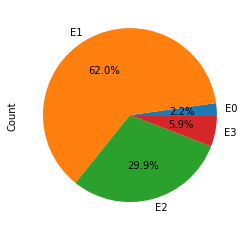

In [726]:
#grouping by offered band column
offer = joined.groupby(['Offered band']).count()
offer = offer[['Sno']].copy()
offer.columns=['Count']
import matplotlib.pyplot as plt
offer.Count.plot(kind="pie",autopct='%1.1f%%');

### Ans) We can Infer that 62% of People Joined were Offered E1 Band and 29.9% of People Joined were offered E2 Band and 5.9% were offered E3 and 2.2% People were offered E0

## Q2) What are the key drivers that influence the candidate joining/not joining a company?

Offered band
E0     211
E1    5578
E2    2704
E3     502
Name: Status, dtype: int64

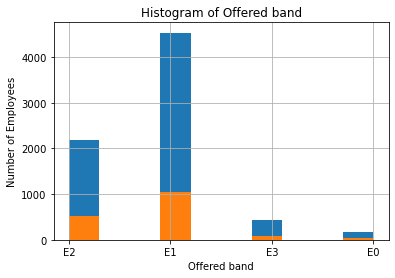

In [727]:
#Offered Band
import matplotlib.pyplot as plt
final_csv.groupby('Status')['Offered band'].hist()
plt.xlabel('Offered band')
plt.ylabel('Number of Employees')
plt.title('Histogram of Offered band')
final_csv.groupby('Offered band')['Status'].count()

*E1 has the most number of people joining and not joining and for every Offered Band there are more number of joined than not joined*

DOJ Extended
No     4788
Yes    4207
Name: Status, dtype: int64

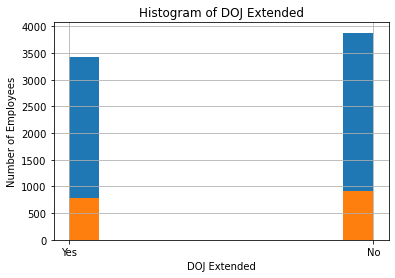

In [728]:
#DOJ Extended
final_csv.groupby('Status')['DOJ Extended'].hist()
plt.xlabel('DOJ Extended')
plt.ylabel('Number of Employees')
plt.title('Histogram of DOJ Extended')
final_csv.groupby('DOJ Extended')['Status'].count()

*There are more number of people who have not extended the date of joining*

Joining Bonus
No     8578
Yes     417
Name: Status, dtype: int64

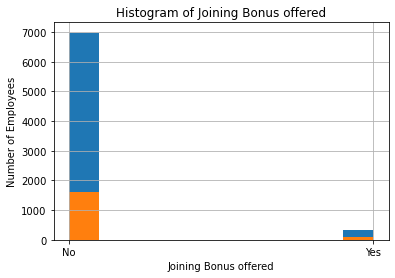

In [729]:
#Joining Bonus
final_csv.groupby('Status')['Joining Bonus'].hist()
plt.xlabel('Joining Bonus offered')
plt.ylabel('Number of Employees')
plt.title('Histogram of Joining Bonus offered')
final_csv.groupby('Joining Bonus')['Status'].count()

*Most of the people were not offered Joining Bonus*

Candidate relocate actual
No     7705
Yes    1290
Name: Status, dtype: int64

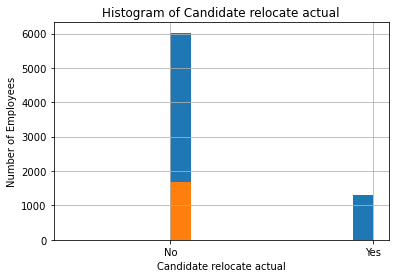

In [730]:
#Candidate relocate actual
final_csv.groupby('Status')['Candidate relocate actual'].hist()
plt.xlabel('Candidate relocate actual')
plt.ylabel('Number of Employees')
plt.title('Histogram of Candidate relocate actual')
final_csv.groupby('Candidate relocate actual')['Status'].count()

*All of those who didn't join would have to reallocate*

Gender
Female    1551
Male      7444
Name: Status, dtype: int64

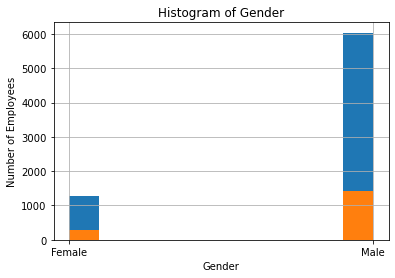

In [731]:
#Gender
final_csv.groupby('Status')['Gender'].hist()
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.title('Histogram of Gender')
final_csv.groupby('Gender')['Status'].count()

*There are more males who are joining the firm than the females*

Candidate Source
Agency               2585
Direct               4801
Employee Referral    1609
Name: Status, dtype: int64

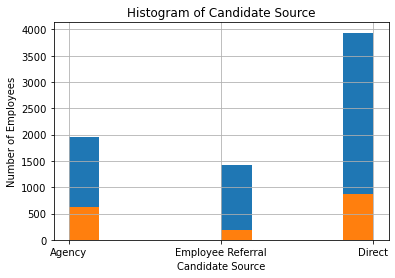

In [732]:
#Candidate Source
final_csv.groupby('Status')['Candidate Source'].hist()
plt.xlabel('Candidate Source')
plt.ylabel('Number of Employees')
plt.title('Histogram of Candidate Source')
final_csv.groupby('Candidate Source')['Status'].count()

*More people joining are directly hired and then second most are by agency hired*

LOB
AXON           568
BFSI          1396
CSMP           579
EAS            346
ERS           2426
ETS            691
Healthcare     124
INFRA         2850
MMS             15
Name: Status, dtype: int64

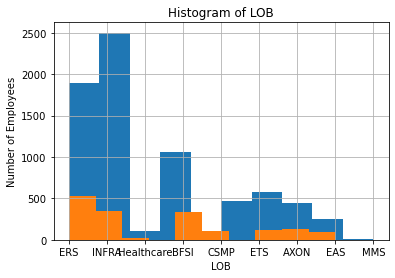

In [733]:
#LOB
final_csv.groupby('Status')['LOB'].hist()
plt.xlabel('LOB')
plt.ylabel('Number of Employees')
plt.title('Histogram of LOB')
final_csv.groupby('LOB')['Status'].count()

*INFRA has the highest number of People joining while ERS has the highest number of people not joining*

Duration to accept offer
0      757
1      843
2      605
3      518
4      475
      ... 
143      1
163      1
181      1
210      1
224      1
Name: Status, Length: 136, dtype: int64

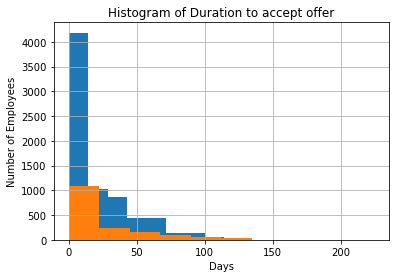

In [734]:
#Duration to accept offer 
final_csv.groupby('Status')['Duration to accept offer'].hist()
plt.xlabel('Days')
plt.ylabel('Number of Employees')
plt.title('Histogram of Duration to accept offer')
final_csv.groupby('Duration to accept offer')['Status'].count()

*Most people accepted or rejected the offer in first 50 days itself*

Notice period
0       777
30     5158
45      526
60     1755
75      110
90      627
120      42
Name: Status, dtype: int64

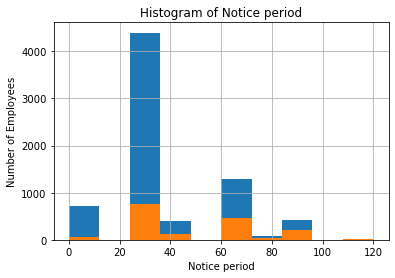

In [735]:
#Notice period
final_csv.groupby('Status')['Notice period'].hist()
plt.xlabel('Notice period')
plt.ylabel('Number of Employees')
plt.title('Histogram of Notice period')
final_csv.groupby('Notice period')['Status'].count()

*Most people were given a notice period of 20-40 days*

Pecent hike expected in CTC
-68.83     1
-62.50     1
-57.43     1
-54.04     1
-48.25     1
          ..
 300.00    1
 306.25    1
 323.08    1
 327.35    1
 359.77    1
Name: Status, Length: 2082, dtype: int64

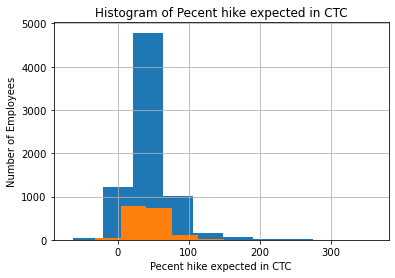

In [736]:
#Pecent hike expected in CTC
final_csv.groupby('Status')['Pecent hike expected in CTC'].hist()
plt.xlabel('Pecent hike expected in CTC')
plt.ylabel('Number of Employees')
plt.title('Histogram of Pecent hike expected in CTC')
final_csv.groupby('Pecent hike expected in CTC')['Status'].count()

*Most People expected a hike of around 50%*

Percent hike offered in CTC
-60.53     1
-60.00     1
-55.75     1
-54.55     1
-53.75     1
          ..
 375.00    1
 393.33    1
 400.00    1
 414.29    1
 471.43    1
Name: Status, Length: 2601, dtype: int64

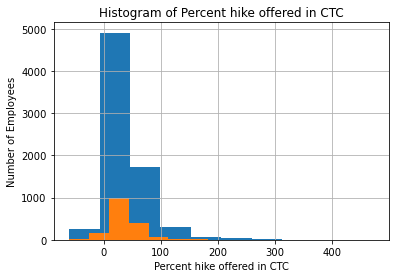

In [737]:
#Percent hike offered in CTC
final_csv.groupby('Status')['Percent hike offered in CTC'].hist()
plt.xlabel('Percent hike offered in CTC')
plt.ylabel('Number of Employees')
plt.title('Histogram of Percent hike offered in CTC')
final_csv.groupby('Percent hike offered in CTC')['Status'].count()

*Most people were given a hike of around 50%*

Rex in Yrs
0      250
1      636
2      963
3     2487
4     1489
5      831
6      795
7      578
8      426
9      205
10     140
11      53
12      45
13      47
14      19
15      14
16       5
17       3
18       1
20       5
22       2
24       1
Name: Status, dtype: int64

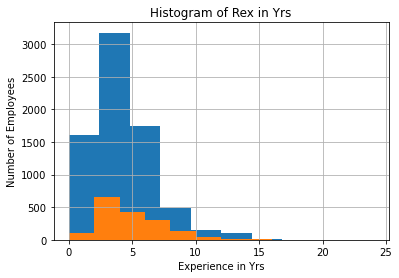

In [738]:
#Rex in Yrs
final_csv.groupby('Status')['Rex in Yrs'].hist()
plt.xlabel('Experience in Yrs')
plt.ylabel('Number of Employees')
plt.title('Histogram of Rex in Yrs')
final_csv.groupby('Rex in Yrs')['Status'].count()

*Most people have a experience of 5 years or less*

Age
20.000000       2
21.000000       3
22.000000      58
23.000000     221
24.000000     397
25.000000     676
26.000000     839
27.000000     903
28.000000     770
29.000000     630
29.912027      15
30.000000     575
31.000000     485
32.000000     378
33.000000     298
34.000000    2142
35.000000     168
36.000000     127
37.000000      86
38.000000      62
39.000000      44
40.000000      39
41.000000      18
42.000000      16
43.000000      11
44.000000       6
45.000000       9
46.000000       3
47.000000       2
48.000000       3
49.000000       3
50.000000       4
51.000000       1
60.000000       1
Name: Status, dtype: int64

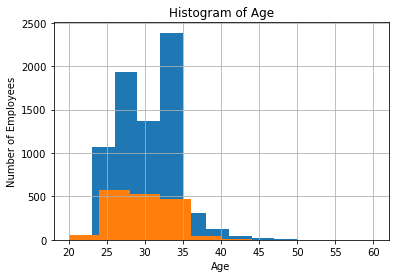

In [739]:
#Age
final_csv.groupby('Status')['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.title('Histogram of Age')
final_csv.groupby('Age')['Status'].count()

*Most people are aged between 25-35*

*Performing Chi Square and Anova Test wrt to 'Status' on all columns.*

In [740]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

d=pd.crosstab(final_csv['Status'],final_csv['Location'])
d1=pd.crosstab(final_csv['Status'],final_csv['DOJ Extended'])
d2=pd.crosstab(final_csv['Status'],final_csv['Offered band'])
d3=pd.crosstab(final_csv['Status'],final_csv['Joining Bonus'])
d4=pd.crosstab(final_csv['Status'],final_csv['Candidate relocate actual'])
d5=pd.crosstab(final_csv['Status'],final_csv['Gender'])
d6=pd.crosstab(final_csv['Status'],final_csv['Candidate Source'])
d7=pd.crosstab(final_csv['Status'],final_csv['LOB'])

*Observed Values*

In [741]:
obs=d.values
obs1=d1.values
obs2=d2.values
obs3=d3.values
obs4=d4.values
obs5=d5.values
obs6=d6.values
obs7=d7.values

In [742]:
val=stats.chi2_contingency(d)
val1=stats.chi2_contingency(d1)
val2=stats.chi2_contingency(d2)
val3=stats.chi2_contingency(d3)
val4=stats.chi2_contingency(d4)
val5=stats.chi2_contingency(d5)
val6=stats.chi2_contingency(d6)
val7=stats.chi2_contingency(d7)

*Expected Values*

In [743]:
expected=val[3]
expected1=val1[3]
expected2=val2[3]
expected3=val3[3]
expected4=val4[3]
expected5=val5[3]
expected6=val6[3]
expected7=val7[3]


*Finding degree of Freedom*

In [744]:
rows=len(d.iloc[0:,0])
col=len(d.iloc[0,0:])
dof=(rows-1)*(col-1)

rows1=len(d1.iloc[0:,0])
col1=len(d1.iloc[0,0:])
dof1=(rows1-1)*(col1-1)

rows2=len(d2.iloc[0:,0])
col2=len(d2.iloc[0,0:])
dof2=(rows2-1)*(col2-1)

rows3=len(d3.iloc[0:,0])
col3=len(d3.iloc[0,0:])
dof3=(rows3-1)*(col3-1)

rows4=len(d4.iloc[0:,0])
col4=len(d4.iloc[0,0:])
dof4=(rows4-1)*(col4-1)

rows5=len(d5.iloc[0:,0])
col5=len(d5.iloc[0,0:])
dof5=(rows5-1)*(col5-1)

rows5=len(d5.iloc[0:,0])
col5=len(d5.iloc[0,0:])
dof5=(rows5-1)*(col5-1)

rows6=len(d6.iloc[0:,0])
col6=len(d6.iloc[0,0:])
dof6=(rows6-1)*(col6-1)

rows7=len(d7.iloc[0:,0])
col7=len(d7.iloc[0,0:])
dof7=(rows7-1)*(col7-1)

In [745]:
alpha=0.05

*Between Status and Location*

In [746]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(obs,expected)])
chi_square_statistic=sum(chi_square)
pvalue=1-chi2.cdf(x=chi_square_statistic,df=dof)
pvalue
if(pvalue<=0.05):
    print("There is a correlation between Status and Location")
else:
    print("There is no correlation between Status and Location")
    

There is a correlation between Status and Location


*Between Status and DOJ Extended*

In [747]:
from scipy.stats import chi2
chi_square1=sum([(o-e)**2./e for o,e in zip(obs1,expected1)])
chi_square_statistic1=sum(chi_square1)
pvalue1=1-chi2.cdf(x=chi_square_statistic1,df=dof1)
pvalue1
if(pvalue1<=0.05):
    print("There is a correlation between Status and DOJ Extended")
else:
    print("There is no correlation between Status and DOJ Extended")

There is no correlation between Status and DOJ Extended


 *Between Status and Offered Band*

In [748]:
from scipy.stats import chi2
chi_square2=sum([(o-e)**2./e for o,e in zip(obs2,expected2)])
chi_square_statistic2=sum(chi_square2)
pvalue2=1-chi2.cdf(x=chi_square_statistic2,df=dof2)
pvalue2
if(pvalue2<=0.05):
    print("There is a correlation between Status and Offered Band")
else:
    print("There is no correlation between Status and Offered Band")

There is a correlation between Status and Offered Band


 *Between Status and Location*

In [749]:
from scipy.stats import chi2
chi_square3=sum([(o-e)**2./e for o,e in zip(obs3,expected3)])
chi_square_statistic3=sum(chi_square3)
pvalue3=1-chi2.cdf(x=chi_square_statistic3,df=dof3)
pvalue3
if(pvalue3<=0.05):
    print("There is a correlation between Status and Joining Bonus")
else:
    print("There is no correlation between Status and Joining Bonus")

There is no correlation between Status and Joining Bonus


*Between Status and Candidate relocate actual*

In [750]:
from scipy.stats import chi2
chi_square4=sum([(o-e)**2./e for o,e in zip(obs4,expected4)])
chi_square_statistic4=sum(chi_square4)
pvalue4=1-chi2.cdf(x=chi_square_statistic4,df=dof4)
pvalue4
if(pvalue4<=0.05):
    print("There is a correlation between Status and Candidate relocate actual")
else:
    print("There is no correlation between Status and Candidate relocate actual")

There is a correlation between Status and Candidate relocate actual


*Between Status and Gender*

In [751]:
from scipy.stats import chi2
chi_square5=sum([(o-e)**2./e for o,e in zip(obs5,expected5)])
chi_square_statistic5=sum(chi_square5)
pvalue5=1-chi2.cdf(x=chi_square_statistic5,df=dof5)
pvalue5
if(pvalue5<=0.05):
    print("There is a correlation between Status and Gender")
else:
    print("There is no correlation between Status and Gender")

There is no correlation between Status and Gender


*Between Status and Candidate Source*

In [752]:
from scipy.stats import chi2
chi_square6=sum([(o-e)**2./e for o,e in zip(obs6,expected6)])
chi_square_statistic6=sum(chi_square6)
pvalue6=1-chi2.cdf(x=chi_square_statistic6,df=dof6)
pvalue6
if(pvalue6<=0.05):
    print("There is a correlation between Status and Candidate Source")
else:
    print("There is no correlation between Status and Candidate Source")

There is a correlation between Status and Candidate Source


*Between Status and LOB*

In [753]:
from scipy.stats import chi2
chi_square7=sum([(o-e)**2./e for o,e in zip(obs7,expected7)])
chi_square_statistic7=sum(chi_square7)
pvalue7=1-chi2.cdf(x=chi_square_statistic7,df=dof7)
pvalue7
if(pvalue<=0.05):
    print("There is a correlation between Status and LOB")
else:
    print("There is no correlation between Status and LOB")

There is a correlation between Status and LOB


*Anova Tests*

*Between Status and Age*

In [754]:
df_anova = final_csv[['Status','Age']]
grps = pd.unique(df_anova.Status.values)
d_data = {grp:df_anova['Age'][df_anova.Status == grp] for grp in grps}
F, p = stats.ttest_ind(d_data['Joined'], d_data['Not Joined'])
if(p<0.05):
    print('There is a relation between Status and Age')
else:
    print('There is no relation between Status and Age')

There is a relation between Status and Age


*Between Status and Rex in Yrs*

In [755]:
df_anova = final_csv[['Status','Rex in Yrs']]
grps = pd.unique(df_anova.Status.values)
d_data = {grp:df_anova['Rex in Yrs'][df_anova.Status == grp] for grp in grps}
F, p = stats.ttest_ind(d_data['Joined'], d_data['Not Joined'])
if(p<0.05):
    print('There is a relation between Status and Rex in Yrs')
else:
    print('There is no relation between Status and Rex in Yrs')

There is a relation between Status and Rex in Yrs


*Between Status and Rex in Yrs*

In [756]:
df_anova = final_csv[['Status','Duration to accept offer']]
grps = pd.unique(df_anova.Status.values)
d_data = {grp:df_anova['Duration to accept offer'][df_anova.Status == grp] for grp in grps}
F, p = stats.ttest_ind(d_data['Joined'], d_data['Not Joined'])
if(p<0.05):
    print('There is a relation between Status and Duration to accept offer')
else:
    print('There is no relation between Status and Duration to accept offer')

There is a relation between Status and Duration to accept offer


*Between Status and Notice period*

In [757]:
df_anova = final_csv[['Status','Notice period']]
grps = pd.unique(df_anova.Status.values)
d_data = {grp:df_anova['Notice period'][df_anova.Status == grp] for grp in grps}
F, p = stats.ttest_ind(d_data['Joined'], d_data['Not Joined'])
if(p<0.05):
    print('There is a relation between Status and Notice period')
else:
    print('There is no relation between Status and Notice period')

There is a relation between Status and Notice period


*Between Status and Percent hike offered in CTC*

In [758]:
df_anova = final_csv[['Status','Percent hike offered in CTC']]
grps = pd.unique(df_anova.Status.values)
d_data = {grp:df_anova['Percent hike offered in CTC'][df_anova.Status == grp] for grp in grps}
F, p = stats.ttest_ind(d_data['Joined'], d_data['Not Joined'])
if(p<0.05):
    print('There is a relation between Status and Percent hike offered in CTC')
else:
    print('There is no relation between Status and Percent hike offered in CTC')

There is a relation between Status and Percent hike offered in CTC


*Between Status and Percent difference CTC*

In [759]:
df_anova = final_csv[['Status','Percent difference CTC']]
grps = pd.unique(df_anova.Status.values)
d_data = {grp:df_anova['Percent difference CTC'][df_anova.Status == grp] for grp in grps}
F, p = stats.ttest_ind(d_data['Joined'], d_data['Not Joined'])
if(p<0.05):
    print('There is a relation between Status and Percent difference CTC')
else:
    print('There is no relation between Status and Percent difference CTC')

There is a relation between Status and Percent difference CTC


*Between Status and Pecent hike expected in CTC*

In [760]:
df_anova = final_csv[['Status','Pecent hike expected in CTC']]
grps = pd.unique(df_anova.Status.values)
d_data = {grp:df_anova['Pecent hike expected in CTC'][df_anova.Status == grp] for grp in grps}
F, p = stats.ttest_ind(d_data['Joined'], d_data['Not Joined'])
if(p<0.05):
    print('There is a relation between Status and Pecent hike expected in CTC')
else:
    print('There is no relation between Status and Pecent hike expected in CTC')

There is no relation between Status and Pecent hike expected in CTC


### From Chi Square Test , We can conclude that Joining and Not Joining Status is related to Location,Offered Band, Candidate Reallocate Actual , Candidate Source and LOB.

### By Performing Anova Test , we can conclude that Status has a relation with Age , Rex in Yrs , Duration to accept offer, Notice Period , Percent hike offered in CTC , Percent difference CTC


## Q3) Are there specific locations where candidates are not joining?

<BarContainer object of 10 artists>

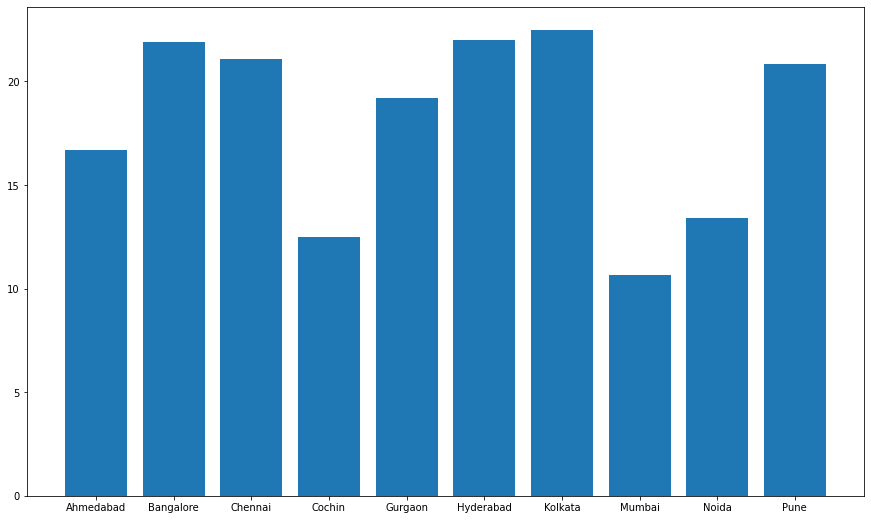

In [761]:
import matplotlib.pyplot as plt

loc=pd.DataFrame(final_csv.groupby(['Location','Status'])['Candidate Ref'].count())
loc.reset_index(inplace=True)
loc=pd.merge(loc, pd.DataFrame(loc.groupby(['Location'])['Candidate Ref'].sum()), left_on = 'Location', right_index=True)
loc['Percentage'] = 100*loc['Candidate Ref_x']/loc['Candidate Ref_y']
locnotjoined = loc[loc['Status'] == 'Not Joined']
plt.figure(figsize=(15,9))
plt.bar(locnotjoined['Location'],locnotjoined['Percentage'])


### We can infer that Kolkata has the highest percentage of People not Joining. Bangalore,Chennai,Hyderabad and Pune also have significantly higher percentage of people not joining as compared to other cities

## Q4) Joining status depends on the duration to accept an offer?

Duration to accept offer
0      757
1      843
2      605
3      518
4      475
      ... 
143      1
163      1
181      1
210      1
224      1
Name: Status, Length: 136, dtype: int64

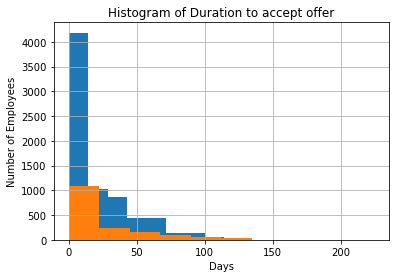

In [762]:
final_csv.groupby('Status')['Duration to accept offer'].hist()
plt.xlabel('Days')
plt.ylabel('Number of Employees')
plt.title('Histogram of Duration to accept offer')
final_csv.groupby('Duration to accept offer')['Status'].count()

In [763]:
final_csv.groupby('Status')['Duration to accept offer'].mean()

Status
Joined        20.624368
Not Joined    24.956599
Name: Duration to accept offer, dtype: float64

In [764]:
final_csv['Duration to accept offer'].sum()

192803

### We can also see the mean of joined and not joined based on duration to accept offer have a significant difference

### And also after performing Anova Test in Q2 , We can conclude that Joining Status Depends on the duration to accept an offer as p value is less than 0.05.

## Q5) Hike offered has an impact on joining status?

Percent hike offered in CTC
-60.53     1
-60.00     1
-55.75     1
-54.55     1
-53.75     1
          ..
 375.00    1
 393.33    1
 400.00    1
 414.29    1
 471.43    1
Name: Status, Length: 2601, dtype: int64

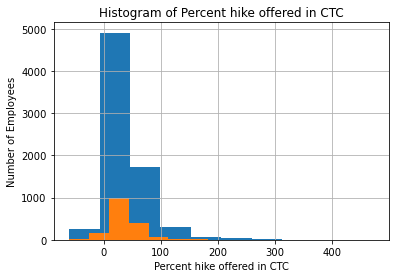

In [765]:
final_csv.groupby('Status')['Percent hike offered in CTC'].hist()
plt.xlabel('Percent hike offered in CTC')
plt.ylabel('Number of Employees')
plt.title('Histogram of Percent hike offered in CTC')
final_csv.groupby('Percent hike offered in CTC')['Status'].count()

In [766]:
final_csv.groupby(['Status'])['Percent hike offered in CTC'].mean()

Status
Joined        41.133205
Not Joined    38.588460
Name: Percent hike offered in CTC, dtype: float64

### As we can see the mean of Percent hike offered is less for the people not joined , which gives us a hint that this variable can be a significant one and is also proved by Anova done in Q2.

### Also after performing Anova Test in Q2 , we can conclude that Hike offered has an impact on joining status as p value is less than 0.05.

# Task 2.2

## Univariate, Bi- Variate Analysis and Multi- Variate Analysis

In [767]:
final_csv.isnull().sum()

Sno                            0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
Location                       0
Age                            0
LOB_id                         0
LOB                            0
Status                         0
dtype: int64

*Missing values identification and treatment - There are no missing values as we already fixed it in Task 2.1*

In [768]:
df=final_csv.drop(['Candidate Ref','Sno','LOB_id','Percent difference CTC'],axis=1)

*Dropping the columns which were insignificant*

In [769]:
df

DOJ Extended  Duration to accept offer  Notice period Offered band  \
0             Yes                        14             30           E2   
1              No                        18             30           E2   
2              No                         3             45           E2   
3              No                        26             30           E2   
4             Yes                         1            120           E2   
...           ...                       ...            ...          ...   
8990           No                         4              0           E1   
8991          Yes                         2              0           E1   
8992           No                         0              0           E2   
8993           No                         0             30           E1   
8994           No                         2              0           E1   

      Pecent hike expected in CTC  Percent hike offered in CTC Joining Bonus  \
0                          -20.79                        13.16            No   
1                           50.00                       320.00            No   
2                           42.84                        42.84            No   
3                           42.84                        42.84            No   
4                           42.59                        42.59            No   
...                           ...                          ...           ...   
8990                       191.67                       191.67            No   
8991                       150.00                       150.00            No   
8992                        35.42                        35.42            No   
8993                        76.92                        53.85            No   
8994                        45.25                        14.09            No   

     Candidate relocate actual  Gender   Candidate Source  Rex in Yrs  \
0                           No  Female             Agency           7   
1                           No    Male  Employee Referral           8   
2                           No    Male             Agency           4   
3                           No    Male  Employee Referral           4   
4                          Yes    Male  Employee Referral           6   
...                        ...     ...                ...         ...   
8990                        No    Male  Employee Referral           1   
8991                        No  Female             Direct           3   
8992                        No    Male             Direct           5   
8993                        No    Male             Direct           4   
8994                        No  Female  Employee Referral           1   

     Location   Age    LOB  Status  
0       Noida  34.0    ERS  Joined  
1     Chennai  34.0  INFRA  Joined  
2       Noida  27.0  INFRA  Joined  
3       Noida  34.0  INFRA  Joined  
4       Noida  34.0  INFRA  Joined  
...       ...   ...    ...     ...  
8990  Chennai  34.0    ERS  Joined  
8991  Chennai  34.0   BFSI  Joined  
8992    Noida  34.0  INFRA  Joined  
8993    Noida  34.0  INFRA  Joined  
8994  Chennai  34.0  INFRA  Joined  

[8995 rows x 15 columns]

#### Plotting a Correlation map for all numeric variables

<AxesSubplot:>

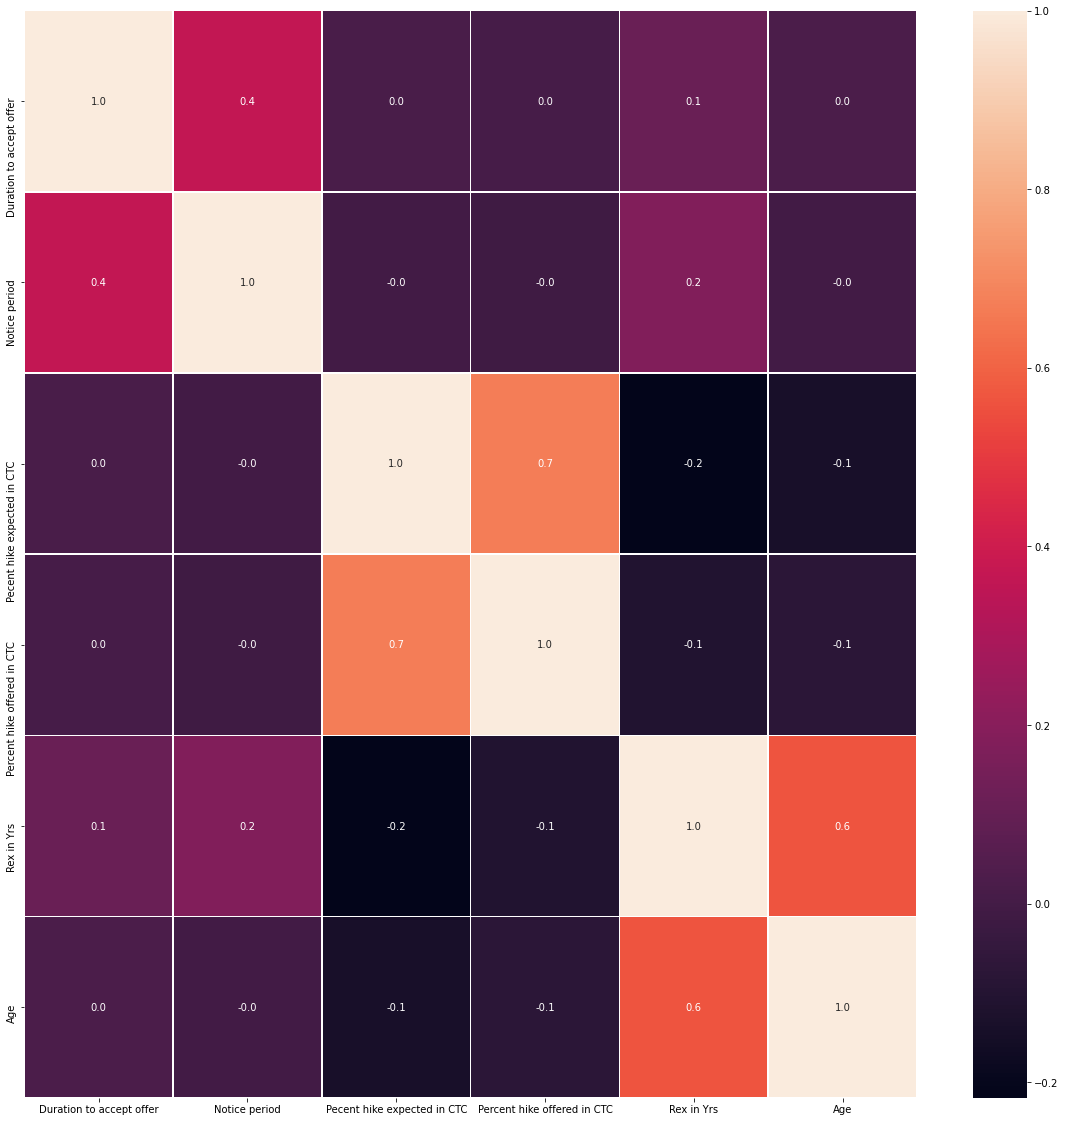

In [770]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

**

Text(0.5, 1.0, 'Notice period')

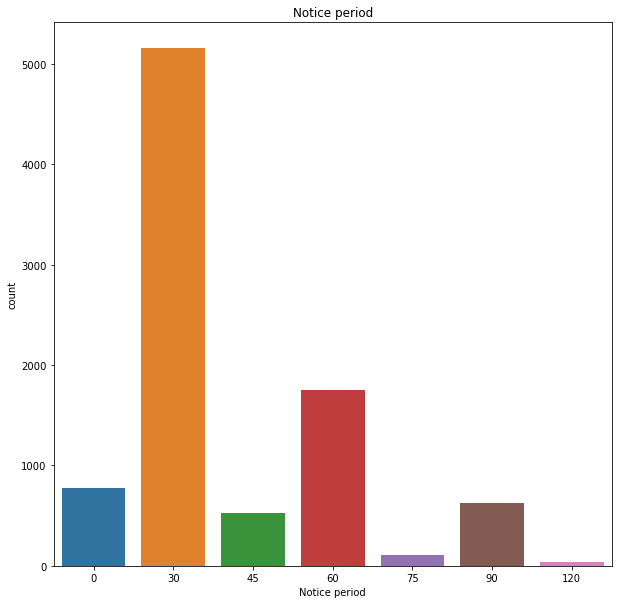

In [771]:
#count of employee according to notice period
sns.countplot(df['Notice period'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Notice period')

*More than 5000 people have a Notice Period of 30 Days*

Text(0.5, 1.0, 'Offered Band')

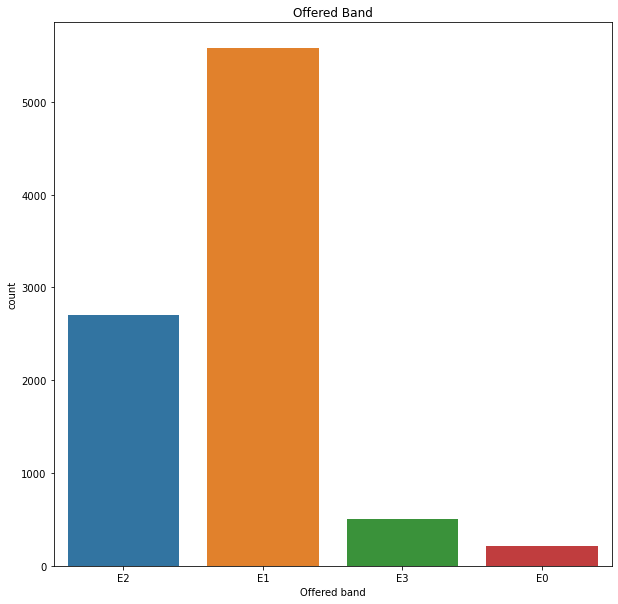

In [772]:
#count of employee based on Offered band
sns.countplot(df['Offered band'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Offered Band')

*E1 is the most offered band*

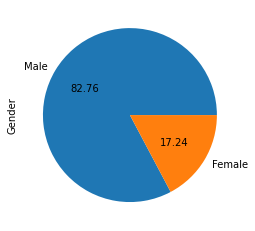

In [773]:
#count of employee bases on their gender.
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

*Males are significantly higher than females *

Text(0.5, 1.0, 'LOB')

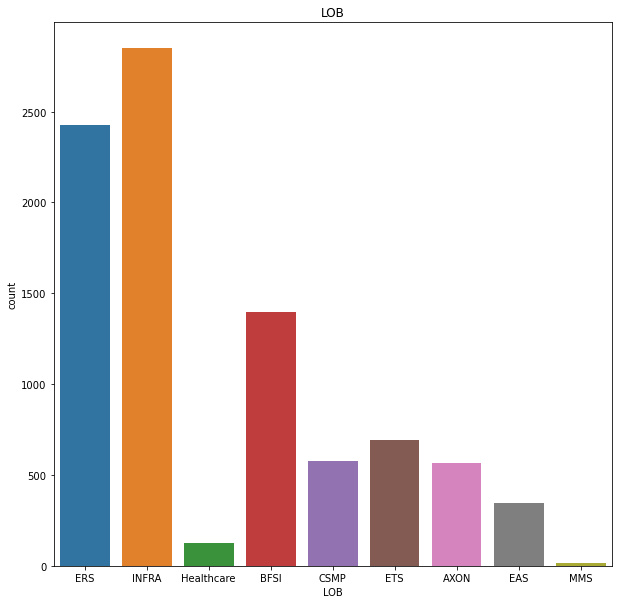

In [774]:
#count of employee based on their line of business
sns.countplot(df['LOB'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('LOB')

*INFRA is most picked line of business*

Text(0.5, 1.0, 'DOJ Extended')

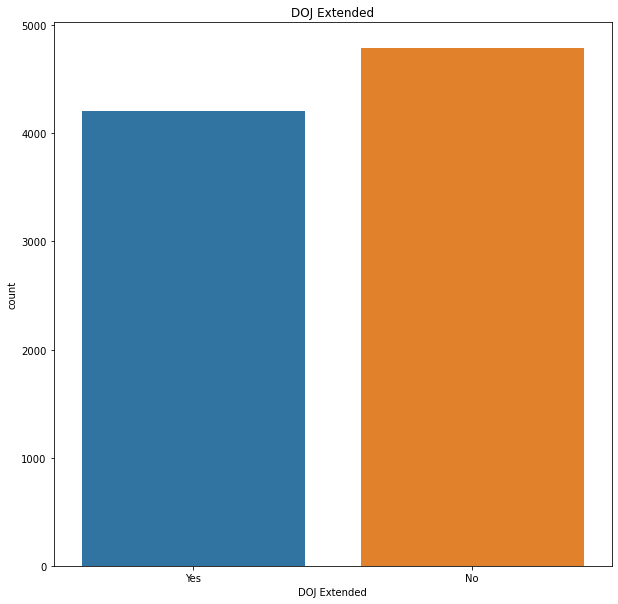

In [775]:
#count of employee based on Date of joining extension
sns.countplot(df['DOJ Extended'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('DOJ Extended')

*More people were not given DOJ Extension*

Text(0.5, 1.0, 'Candidate Source')

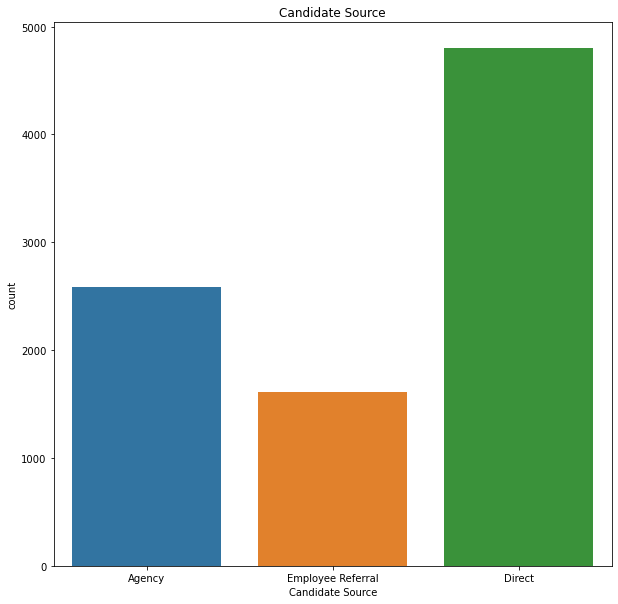

In [776]:
#count of employee bases on their candidate source.
sns.countplot(df['Candidate Source'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Candidate Source')

*More People are Directly Hired*

<AxesSubplot:xlabel='Location', ylabel='count'>

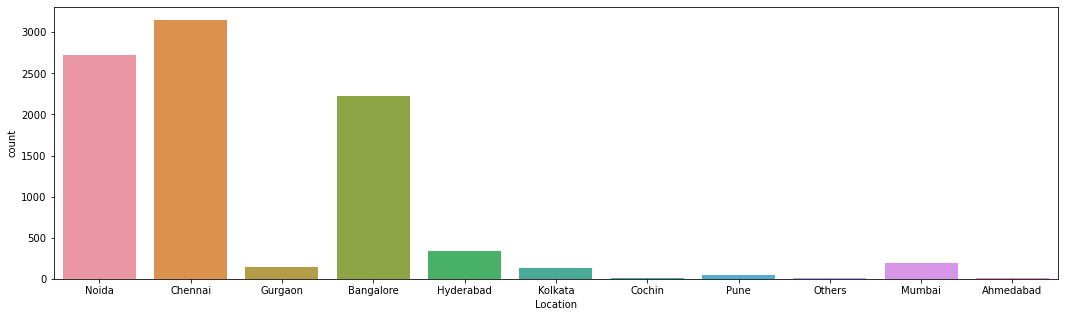

In [777]:
#count of employee according to location
plt.subplots(figsize=(18,5))
sns.countplot(df.Location)

*Most People are from Noida, Chennai and Bangalore*

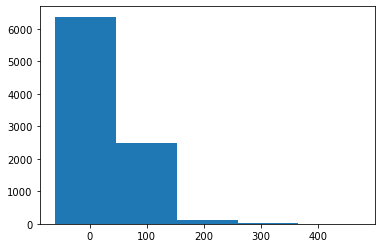

In [778]:
#count of employee who got hike in CTC
plt.hist(df['Percent hike offered in CTC'], bins=5)
plt.show()

*Most People got a hike of around 100%*

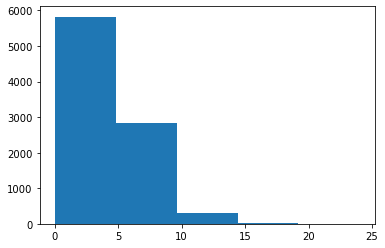

In [779]:
#count of employee based on their years of experience.
plt.hist(df['Rex in Yrs'], bins=5)
plt.show()

*Most people have experience of 10 years or less*

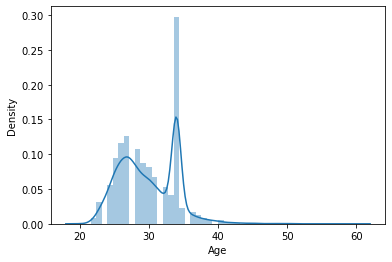

In [780]:
#count of employee based on their Age.
sns.distplot(df['Age']) 
plt.show()

*More people hired are around the age of 25-35*

### Bi-variate Analysis

<AxesSubplot:xlabel='Rex in Yrs', ylabel='Age'>

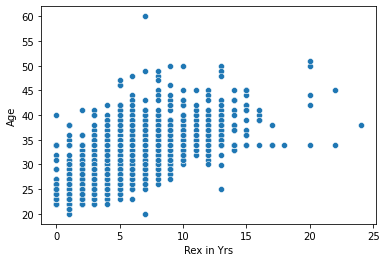

In [781]:
#Plotting a graph to analyse the relation between age and year of experience.
sns.scatterplot(df["Rex in Yrs"], df["Age"])

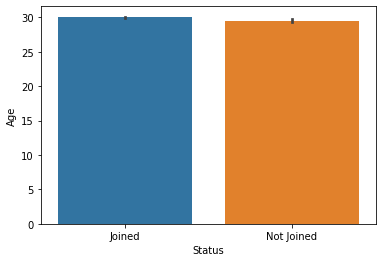

In [782]:
#analyze to check status of employee according to age.
sns.barplot(df['Status'], df['Age'])
plt.show()

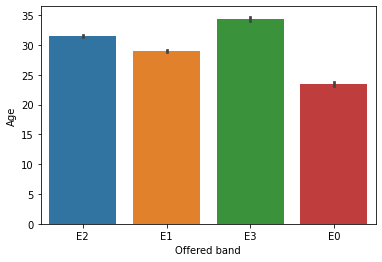

In [783]:
#analyze the offered band according  to age.
sns.barplot(df['Offered band'], df['Age'])
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Age'>

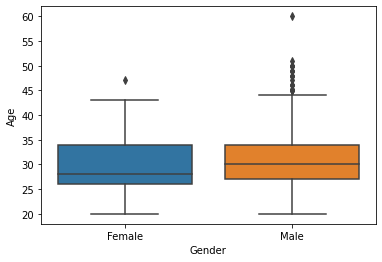

In [784]:
#plotting a graph between gender and age.
sns.boxplot(df['Gender'], df["Age"])

### Multi-variate Analysis

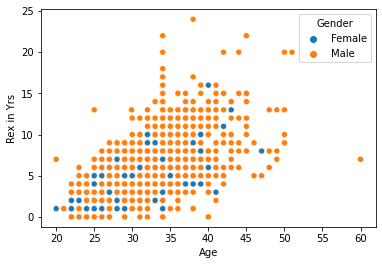

In [785]:
#plot a  graph to to analyze the no of exp of employee bases on their age and gender.
sns.scatterplot(df["Age"], df["Rex in Yrs"], hue=df["Gender"])
plt.show()

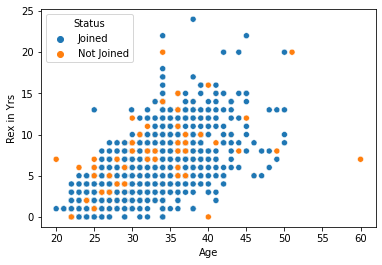

In [786]:
#plot a  graph to to analyze the no of exp of employee bases on their Age and Status.
sns.scatterplot(df["Age"], df["Rex in Yrs"], hue=df["Status"])
plt.show()

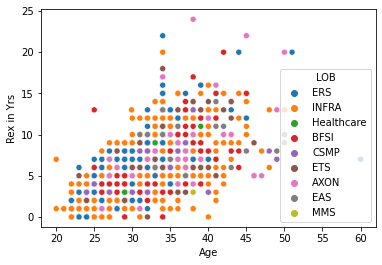

In [787]:
sns.scatterplot(df["Age"], df["Rex in Yrs"], hue=df["LOB"])
plt.show()

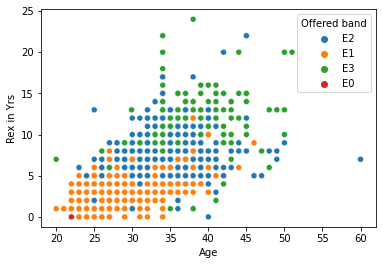

In [690]:
#plot a  graph to to analyze the no of exp of employee bases on their age and gender.
sns.scatterplot(df["Age"], df["Rex in Yrs"], hue=df["Offered band"])
plt.show()

### Data Transformation

In [788]:
df['Joining_Bonus']=df['Joining Bonus']
df['DOJ_Extended']=df['DOJ Extended']
df['Candidate_Source']=df['Candidate Source']
df['Candidate_relocate_actual']=df['Candidate relocate actual']
df['Offered_band']=df['Offered band']

*Converting column names without spaces so that they can be used for One Hot Encoding*

In [789]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(df.Location.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Location_"+str(int(i)) for i in range(0,11)]) 
df = pd.concat([df, dfOneHot], axis=1)
df= df.drop(['Location'], axis=1) 
X = onehotencoder.fit_transform(df.Joining_Bonus.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["JoiningBonus"+str(int(i)) for i in range(0,2)]) 
df = pd.concat([df, dfOneHot], axis=1) 
df= df.drop(['Joining_Bonus'], axis=1) 
df= df.drop(['Joining Bonus'], axis=1) 
X = onehotencoder.fit_transform(df.DOJ_Extended.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["DOJ_Extended"+str(int(i)) for i in range(0,2)]) 
df = pd.concat([df, dfOneHot], axis=1)
df= df.drop(['DOJ_Extended'], axis=1) 
df= df.drop(['DOJ Extended'], axis=1) 
X = onehotencoder.fit_transform(df.Candidate_Source.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Candidate_Source"+str(int(i)) for i in range(0,3)]) 
df = pd.concat([df, dfOneHot], axis=1) 
df= df.drop(['Candidate_Source'], axis=1) 
df= df.drop(['Candidate Source'], axis=1) 
X = onehotencoder.fit_transform(df.Gender.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Gender_"+str(int(i)) for i in range(0,2)]) 
df = pd.concat([df, dfOneHot], axis=1)
df= df.drop(['Gender'], axis=1) 
X = onehotencoder.fit_transform(df.Candidate_relocate_actual.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Candidate_relocate_actual"+str(int(i)) for i in range(0,2)]) 
df = pd.concat([df, dfOneHot], axis=1) 
df= df.drop(['Candidate_relocate_actual'], axis=1) 
df= df.drop(['Candidate relocate actual'], axis=1) 
X = onehotencoder.fit_transform(df.Offered_band.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["Offered_band"+str(int(i)) for i in range(0,4)]) 
df = pd.concat([df, dfOneHot], axis=1) 
df= df.drop(['Offered_band'], axis=1) 
df= df.drop(['Offered band'], axis=1) 
X = onehotencoder.fit_transform(df.LOB.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(X, columns = ["LOB_"+str(int(i)) for i in range(0,9)]) 
df = pd.concat([df, dfOneHot], axis=1)
df= df.drop(['LOB'], axis=1) 

*Applying One Hot Encoding on the Categorical Columns*

In [790]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Status']= label_encoder.fit_transform(df['Status'])

*Applying Label Encoding on the Status Column*

### Outlier analysis and treatment 

<AxesSubplot:xlabel='Age'>

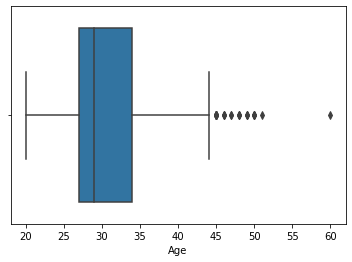

In [791]:
#outlier Treatment
import seaborn as sns
sns.boxplot(data=df,x=df['Age'])

*Dotter points are outliers above the age of 45*

In [792]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

27.0
34.0
7.0
16.5 44.5


In [793]:
df = df[df['Age']< Upper_Whisker]

In [794]:
df.shape

(8969, 42)

<AxesSubplot:xlabel='Age'>

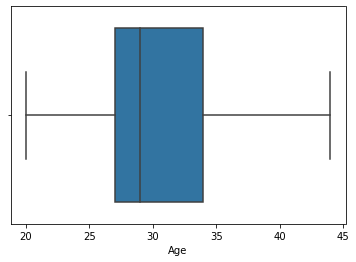

In [795]:
sns.boxplot(data=df,x=df['Age'])

*After Outlier Treatment*

<AxesSubplot:xlabel='Rex in Yrs'>

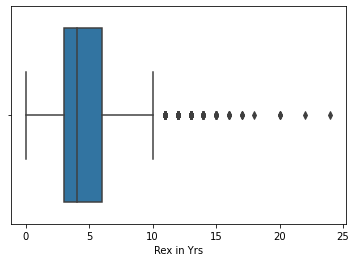

In [796]:
sns.boxplot(data=df,x=df['Rex in Yrs'])

In [797]:
Q1=df['Rex in Yrs'].quantile(0.25)
Q3=df['Rex in Yrs'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)
df = df[df['Rex in Yrs']< Upper_Whisker]

3.0
6.0
3.0
-1.5 10.5


In [798]:
df.shape

(8786, 42)

<AxesSubplot:xlabel='Rex in Yrs'>

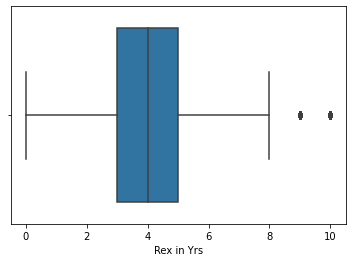

In [799]:
sns.boxplot(data=df,x=df['Rex in Yrs'])

<AxesSubplot:xlabel='Notice period'>

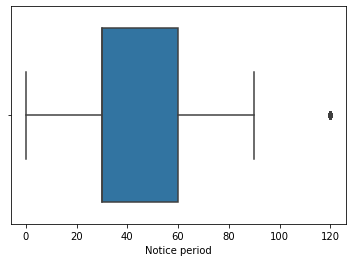

In [800]:
sns.boxplot(data=df,x=df['Notice period'])

In [801]:
Q1=df['Notice period'].quantile(0.25)
Q3=df['Notice period'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

30.0
60.0
30.0
-15.0 105.0


In [802]:
df = df[df['Notice period']< Upper_Whisker]

In [803]:
df.shape

(8747, 42)

<AxesSubplot:xlabel='Notice period'>

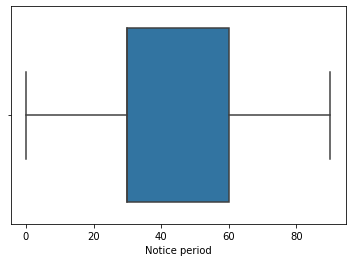

In [804]:
sns.boxplot(data=df,x=df['Notice period'])

<AxesSubplot:xlabel='Percent hike offered in CTC'>

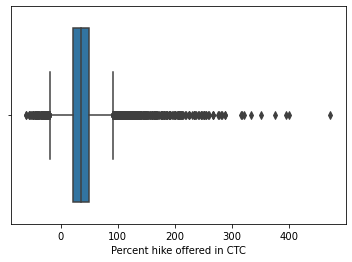

In [805]:
sns.boxplot(data=df,x=df['Percent hike offered in CTC'])

In [806]:
Q1=df['Percent hike offered in CTC'].quantile(0.25)
Q3=df['Percent hike offered in CTC'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

22.31
50.0
27.69
-19.225000000000005 91.535


In [807]:
df = df[df['Percent hike offered in CTC']< Upper_Whisker]

In [808]:
df.shape

(8198, 42)

<AxesSubplot:xlabel='Percent hike offered in CTC'>

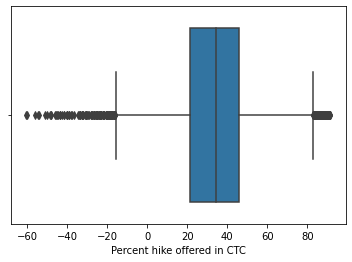

In [809]:
sns.boxplot(data=df,x=df['Percent hike offered in CTC'])

### Z-score normalisation 

# Task 2.4

In [810]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Build appropriate model/s on the data.

In [813]:
df.columns

Index(['Duration to accept offer', 'Notice period',
       'Pecent hike expected in CTC', 'Percent hike offered in CTC',
       'Rex in Yrs', 'Age', 'Status', 'Location_0', 'Location_1', 'Location_2',
       'Location_3', 'Location_4', 'Location_5', 'Location_6', 'Location_7',
       'Location_8', 'Location_9', 'Location_10', 'JoiningBonus0',
       'JoiningBonus1', 'DOJ_Extended0', 'DOJ_Extended1', 'Candidate_Source0',
       'Candidate_Source1', 'Candidate_Source2', 'Gender_0', 'Gender_1',
       'Candidate_relocate_actual0', 'Candidate_relocate_actual1',
       'Offered_band0', 'Offered_band1', 'Offered_band2', 'Offered_band3',
       'LOB_0', 'LOB_1', 'LOB_2', 'LOB_3', 'LOB_4', 'LOB_5', 'LOB_6', 'LOB_7',
       'LOB_8'],
      dtype='object')

*Feature Columns*

In [822]:
X = df[['Duration to accept offer', 'Notice period',
       'Pecent hike expected in CTC', 'Percent hike offered in CTC',
       'Rex in Yrs', 'Age', 'Location_0', 'Location_1', 'Location_2',
       'Location_3', 'Location_4', 'Location_5', 'Location_6', 'Location_7',
       'Location_8', 'Location_9', 'Location_10', 'JoiningBonus0',
       'JoiningBonus1', 'DOJ_Extended0', 'DOJ_Extended1', 'Candidate_Source0',
       'Candidate_Source1', 'Candidate_Source2', 'Gender_0', 'Gender_1',
       'Candidate_relocate_actual0', 'Candidate_relocate_actual1',
       'Offered_band0', 'Offered_band1', 'Offered_band2', 'Offered_band3',
       'LOB_0', 'LOB_1', 'LOB_2', 'LOB_3', 'LOB_4', 'LOB_5', 'LOB_6', 'LOB_7',
       'LOB_8']]
y = df['Status']

*Splitting the data as 80% training and 20% testing*

In [823]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [824]:
x_train.shape

(6558, 41)

*Train Set has 6558 values*

In [825]:
x_test.shape

(1640, 41)

*Test Set has 1640 values*

**Model - Logistic Regression**

In [826]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import logging,sys

In [832]:
logistic_regression= LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)

In [833]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1340
           1       0.52      0.08      0.14       300

    accuracy                           0.82      1640
   macro avg       0.67      0.53      0.52      1640
weighted avg       0.77      0.82      0.76      1640



*F-score for 0 is .90 which shows it's prediction zeros with good accuracy but 
for 1 is 0.14 which shows it's predicting 1's with low accuracy*

### Parameter Tuning

In [834]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

*Using Grid Search to select the best parameters for our model*

In [836]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logistic_regression, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [841]:
best_clf.fit(x_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             verbose=True)

In [842]:
y_pred=best_clf.predict(x_test)

#### Performance of the model

In [843]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1340
           1       0.68      0.06      0.10       300

    accuracy                           0.82      1640
   macro avg       0.75      0.53      0.50      1640
weighted avg       0.80      0.82      0.76      1640



*After parameter tuning precision for 1 is increased but f1-score decreased and overall accuracy of the model remained same*

### **Model - Decision Tree**

In [916]:
dtree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=11,max_depth=6)
dtree.fit(x_train,y_train)
pred_dtree = dtree.predict(x_test)
print("Accuracy for decision tree model = ",metrics.accuracy_score(y_test,pred_dtree))

Accuracy for decision tree model =  0.8128048780487804


In [917]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1340
           1       0.47      0.17      0.25       300

    accuracy                           0.81      1640
   macro avg       0.65      0.56      0.57      1640
weighted avg       0.77      0.81      0.78      1640



*F1-Score for predicting 1's is much better in decision tree as compared to Logistic regression*

### Hyperparameter Tuning

In [909]:
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier()

params={
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'min_samples_split':[2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'max_depth':[2,3,4,5,6,7]
}

tree_search=GridSearchCV(dtree,params,cv=5,n_jobs=-1)
tree_search.fit(x_train,y_train)
pred=tree_search.predict(x_test)

print("Best parameters found: \n{}\n".format(tree_search.best_params_))
print("Train score: {}\n".format(tree_search.score(x_train,y_train)))
print("Test score: {}\n".format(tree_search.score(x_test,y_test)))
print('Overall model accuracy: {}\n'.format(metrics.accuracy_score(y_test,pred)))

Best parameters found: 
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 5}

Train score: 0.8098505641964013

Test score: 0.8195121951219512

Overall model accuracy: 0.8195121951219512



*Using the best parameters found from gridsearch*

In [913]:
dtree = DecisionTreeClassifier(criterion='gini',min_samples_leaf=9,max_depth=7,min_samples_split=5,max_features='auto')
dtree.fit(x_train,y_train)
pred_dtree = dtree.predict(x_test)
print("Accuracy for decision tree model = ",metrics.accuracy_score(y_test,pred_dtree))

Accuracy for decision tree model =  0.8158536585365853


#### Evalute Performace of the Model

In [914]:
scores=cross_val_score(dtree,X,y,cv=20)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(),scores.std()*2))

Accuracy: 0.80 (+/- 0.04)


In [915]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1340
           1       0.38      0.01      0.02       300

    accuracy                           0.82      1640
   macro avg       0.60      0.50      0.46      1640
weighted avg       0.74      0.82      0.74      1640



*F1 score for 0 increased but for predicting 1's it decreased significantly after parameter tuning*

### **Model - Random Forest**

In [918]:
rand = RandomForestClassifier(criterion='gini',n_estimators=120,max_depth=6)
rand.fit(x_train,y_train)
pred_rand = rand.predict(x_test)
print("Accuracy for the random forest model = ",metrics.accuracy_score(y_test,pred_rand))

Accuracy for the random forest model =  0.8182926829268292


In [919]:
print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1340
           1       1.00      0.01      0.01       300

    accuracy                           0.82      1640
   macro avg       0.91      0.50      0.46      1640
weighted avg       0.85      0.82      0.74      1640



*F1-Score for predicting 1 is very less*

### Hyperparameter Tuning

In [893]:
rand = RandomForestClassifier(n_estimators=10)

params={
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'min_samples_split':[2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'max_depth':[2,3,4,5,6,7]
}

forest_search=GridSearchCV(rand,params,cv=5,n_jobs=-1)
forest_search.fit(x_train,y_train)
pred=forest_search.predict(x_test)

print("Best parameters found: \n{}\n".format(forest_search.best_params_))
print("Train score: {}\n".format(forest_search.score(x_train,y_train)))
print("Test score: {}\n".format(forest_search.score(x_test,y_test)))
print('Overall model accuracy: {}\n'.format(metrics.accuracy_score(y_test,pred)))


Best parameters found: 
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8}

Train score: 0.8116803903629155

Test score: 0.8195121951219512

Overall model accuracy: 0.8195121951219512



*Using the best parameters through gridsearch*

#### Evalute Performace of the Model

In [924]:
rand = RandomForestClassifier(n_estimators=10,criterion='gini',min_samples_leaf=1,max_depth=6,min_samples_split=8,max_features='auto')
rand.fit(x_train,y_train)
pred_rand = rand.predict(x_test)
print("Accuracy = ",metrics.accuracy_score(y_test,pred_rand))

Accuracy =  0.8201219512195121


In [925]:
print(classification_report(y_test,pred_rand))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1340
           1       0.86      0.02      0.04       300

    accuracy                           0.82      1640
   macro avg       0.84      0.51      0.47      1640
weighted avg       0.83      0.82      0.74      1640



*After Hyperparameter tuning f1-score for predicting 1's is increased by 0.03 and for predicting zeros it's same*

### **Model - Xgboost**

In [902]:
#Xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

In [926]:
model = XGBClassifier()
model.fit(x_train, y_train)

[00:53:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [927]:
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

In [928]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.55%


In [929]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1340
           1       0.45      0.26      0.33       300

    accuracy                           0.81      1640
   macro avg       0.65      0.59      0.61      1640
weighted avg       0.77      0.81      0.78      1640



*Xgboost has best f1 score among all models for predicting 1's*

### Comparing all the 4 Models 
### -Random forest has given the best accuracy of 82% 
### -Xgboost has given the best F1 Scores

#### Q) Identify issues and concerns on the given data and suggest the best techniques to overcome the issues.

#### Data has more number of people who have joined the company ,around 80% of people in the data have joined the company that's why f1 score for predicting 1's is significantly less(not joined) and accuracy of our models is around 81% and 82%. To overcome this more data is required for the not joined people 